# Data preparation and analysis

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
books = pd.read_csv('Dataset/Books.csv', on_bad_lines="skip")
users = pd.read_csv("Dataset/Users.csv", on_bad_lines="skip")
ratings = pd.read_csv("Dataset/Ratings.csv", on_bad_lines="skip")

C:\Users\Tilda\AppData\Local\Temp\ipykernel_28180\157259749.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Dataset/Books.csv', on_bad_lines="skip")


In [12]:
display(books.head())
display(users.head())
display(ratings.head())

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [13]:
print(books.shape)
print(ratings.shape)
print(users.shape)

(271360, 8)
(1149780, 3)
(278858, 3)


In [14]:
print(books.isnull().sum())
print("\n")
print(ratings.isnull().sum())
print("\n")
print(users.isnull().sum())

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


User-ID          0
Location         0
Age         110762
dtype: int64


In [15]:
books.duplicated().sum()

0

In [16]:
ratings.duplicated().sum()

0

In [17]:
users.duplicated().sum()

0

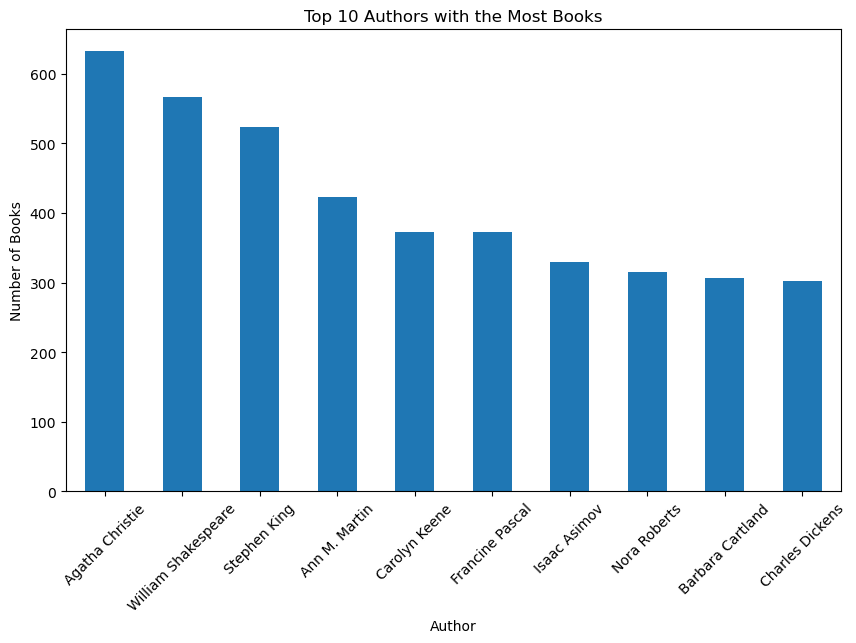

In [18]:
top_authors = books['Book-Author'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_authors.plot(kind='bar')
plt.title('Top 10 Authors with the Most Books')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.show()

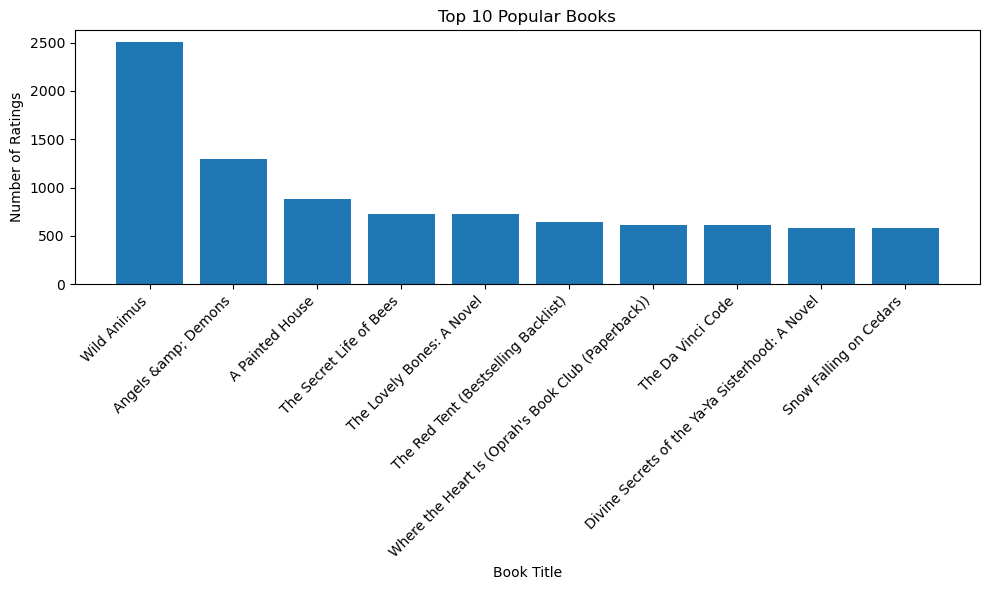

In [19]:
merged_df = pd.merge(books, ratings, on='ISBN')

book_ratings_count = merged_df['ISBN'].value_counts().head(10)

top_10_popular_books = books[books['ISBN'].isin(book_ratings_count.index)]

plt.figure(figsize=(10, 6))
plt.bar(top_10_popular_books['Book-Title'], book_ratings_count)
plt.title('Top 10 Popular Books')
plt.xlabel('Book Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Popularity based recommendation

In [20]:
merged_df = ratings.merge(books,on='ISBN')

In [21]:
num_rating_df = merged_df.groupby('Book-Title').count()['Book-Rating'].reset_index()


num_rating_df.rename(columns={'Book-Rating':'num_ratings'}, inplace=True)

In [22]:
num_rating_df.head()

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1


In [23]:
avg_rating_df = merged_df.groupby('Book-Title').mean(numeric_only=True)['Book-Rating'].reset_index()

avg_rating_df.rename(columns={'Book-Rating':'avg_rating'}, inplace=True)

In [24]:
avg_rating_df.head()

,Book-Title,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,2.25
1,Always Have Popsicles,0.00
2,Apple Magic (The Collector's series),0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.00
4,Beyond IBM: Leadership Marketing and Finance ...,0.00


In [25]:
popular_df = num_rating_df.merge(avg_rating_df, on='Book-Title').drop_duplicates('Book-Title')

popular_df.head()

,Book-Title,num_ratings,avg_rating
0,A Light in the Storm: The Civil War Diary of ...,4,2.25
1,Always Have Popsicles,1,0.00
2,Apple Magic (The Collector's series),1,0.00
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.00
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.00


In [26]:
popular_df = popular_df[popular_df['num_ratings'] >= 250].sort_values('avg_rating', ascending=False).head(50)

popular_df

,Book-Title,num_ratings,avg_rating
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
191612,The Hobbit : The Enchanting Prelude to The Lor...,281,5.007117
187377,The Fellowship of the Ring (The Lord of the Ri...,368,4.948370
80445,Harry Potter and the Sorcerer's Stone (Harry P...,575,4.895652
211384,"The Two Towers (The Lord of the Rings, Part 2)",260,4.880769
219741,To Kill a Mockingbird,510,4.700000


## Collaborative filtering-based recommendation

In [27]:
merged_df.head(2)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


In [28]:
merged_df.groupby('User-ID')['Book-Title'].count()

User-ID
2          1
8         17
9          3
10         1
12         1
          ..
278846     1
278849     4
278851    23
278852     1
278854     8
Name: Book-Title, Length: 92106, dtype: int64

In [29]:
total_ratings_user = merged_df.groupby('User-ID').count()['Book-Rating']

min_200_ratings = total_ratings_user > 200

experienced_readers = total_ratings_user[min_200_ratings].index

In [30]:
filtered_df = merged_df[merged_df['User-ID'].isin(experienced_readers)]
filtered_df.shape

(474007, 10)

In [31]:
book_total_ratings = filtered_df.groupby('Book-Title').count()['Book-Rating']

min_50_ratings = book_total_ratings >= 25

popular_books = book_total_ratings[min_50_ratings].index

In [32]:
final_ratings = filtered_df[filtered_df['Book-Title'].isin(popular_books)]

In [33]:
pt = final_ratings.pivot_table(index='Book-Title', columns='User-ID', values='Book-Rating')

pt.shape

(2237, 811)

In [34]:
pt.head()

User-ID,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,...,271705,273979,274004,274061,274301,274308,275970,277427,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
10 Lb. Penalty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
16 Lighthouse Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010: Odyssey Two,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
pt.fillna(0, inplace=True)

In [36]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(pt)

In [37]:
def recommend(book_name):
    index = np.where(pt.index==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity[index])),key=lambda x:x[1],reverse=True)[1:5]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    
    return data

In [41]:
recommend('Animal Farm')

[['Hamlet',
  'William Shakespeare',
  'http://images.amazon.com/images/P/067172262X.01.MZZZZZZZ.jpg'],
 ['Women in His Life',
  'Barbara Taylor Bradford',
  'http://images.amazon.com/images/P/0345345738.01.MZZZZZZZ.jpg'],
 ['1984',
  'George Orwell',
  'http://images.amazon.com/images/P/0451524934.01.MZZZZZZZ.jpg'],
 ['Black Beauty',
  'Anna Sewell',
  'http://images.amazon.com/images/P/0440403553.01.MZZZZZZZ.jpg']]

In [39]:
import pickle
pickle.dump(popular_df,open('popular.pkl','wb'))

In [40]:
pickle.dump(pt,open('pt.pkl','wb'))
pickle.dump(books,open('books.pkl','wb'))
pickle.dump(similarity,open('similarity_scores.pkl','wb'))